<a href="https://colab.research.google.com/github/marziehsadat/INSE-6220/blob/main/Marziehsadat_Arabi_(Algerian_forest_fires).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

# Install Pycaret

In [12]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from pycaret.utils import version
version()

'2.3.6'

### **Import Libraries**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dataset

The Algerien forest fires dataset has 123 samples, which have 7 features and one output. The measures of each sample are listed in the first seven columns, while the last column identifies the output. The output of this dataset consists of two classes(class 0 or Not fire and class1 or fire)

Attribute Information:

1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
2. RH : Relative Humidity in %: 21 to 90
3. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
4. Drought Code (DC) index from the FWI system: 7 to 220.4
5. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
6. Buildup Index (BUI) index from the FWI system: 1.1 to 68
7. Fire Weather Index (FWI) Index: 0 to 31.1
8. Class: two classes, namely fire and not fire



# **Upload File**

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/marziehsadat/INSE-6220/main/Algerian_forest_fires_dataset.csv')
df.head(n=25)

Temperature   RH   DMC    DC   ISI   BUI   FWI  class
0            32   71   2.5   8.2   0.6   2.8   0.2      0
1            30   73   2.7   7.8   0.6   2.9   0.2      0
2            29   80   2.2   7.6   0.3   2.6   0.1      0
3            30   64   5.2  15.4   2.2   5.6   1.0      0
4            32   60   6.0  17.6   1.8   6.5   0.9      0
5            35   54   8.4  26.3   3.1   9.3   3.1      1
6            35   44   9.9  28.9   5.4  10.7   6.0      1
7            28   51   7.7   7.4   1.5   7.3   0.8      0
8            27   59   8.5  14.7   2.4   8.3   1.9      0
9            30   41  13.3  22.5   8.4  13.1  10.0      1
10           31   42  18.2  30.5  13.4  18.0  16.7      1
11           27   58  21.3  37.8   8.7  21.2  12.9      1
12           30   52  11.4   7.8   1.4  10.9   0.9      0
13           27   79   6.4   7.3   0.5   6.1   0.3      0
14           28   90   7.2  14.7   1.2   7.1   0.6      0
15           29   87   4.2   8.0   0.2   4.1   0.1      0
16           31   69   3.9   8.0   1.1   3.8   0.4      0
17           33   62   4.6   8.3   0.9   4.4   0.4      0
18           32   67   4.4   8.2   1.0   4.2   0.4      0
19           31   72   3.8   8.0   0.8   3.7   0.3      0
20           32   55   8.3  18.4   5.0   8.2   4.9      1
21           33   46   8.1   8.3   1.9   7.7   1.2      0
22           33   59   7.0   8.3   1.6   6.7   0.8      0
23           35   68  10.0  17.0   4.9   9.9   5.3      1
24           34   70  12.8  25.6   5.4  12.7   6.7      1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  122 non-null    int64  
 1    RH          122 non-null    int64  
 2   DMC          122 non-null    float64
 3   DC           122 non-null    float64
 4   ISI          122 non-null    float64
 5   BUI          122 non-null    float64
 6   FWI          122 non-null    float64
 7   class        122 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 7.8 KB


In [17]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [18]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


## **Exploratory Data Analysis**

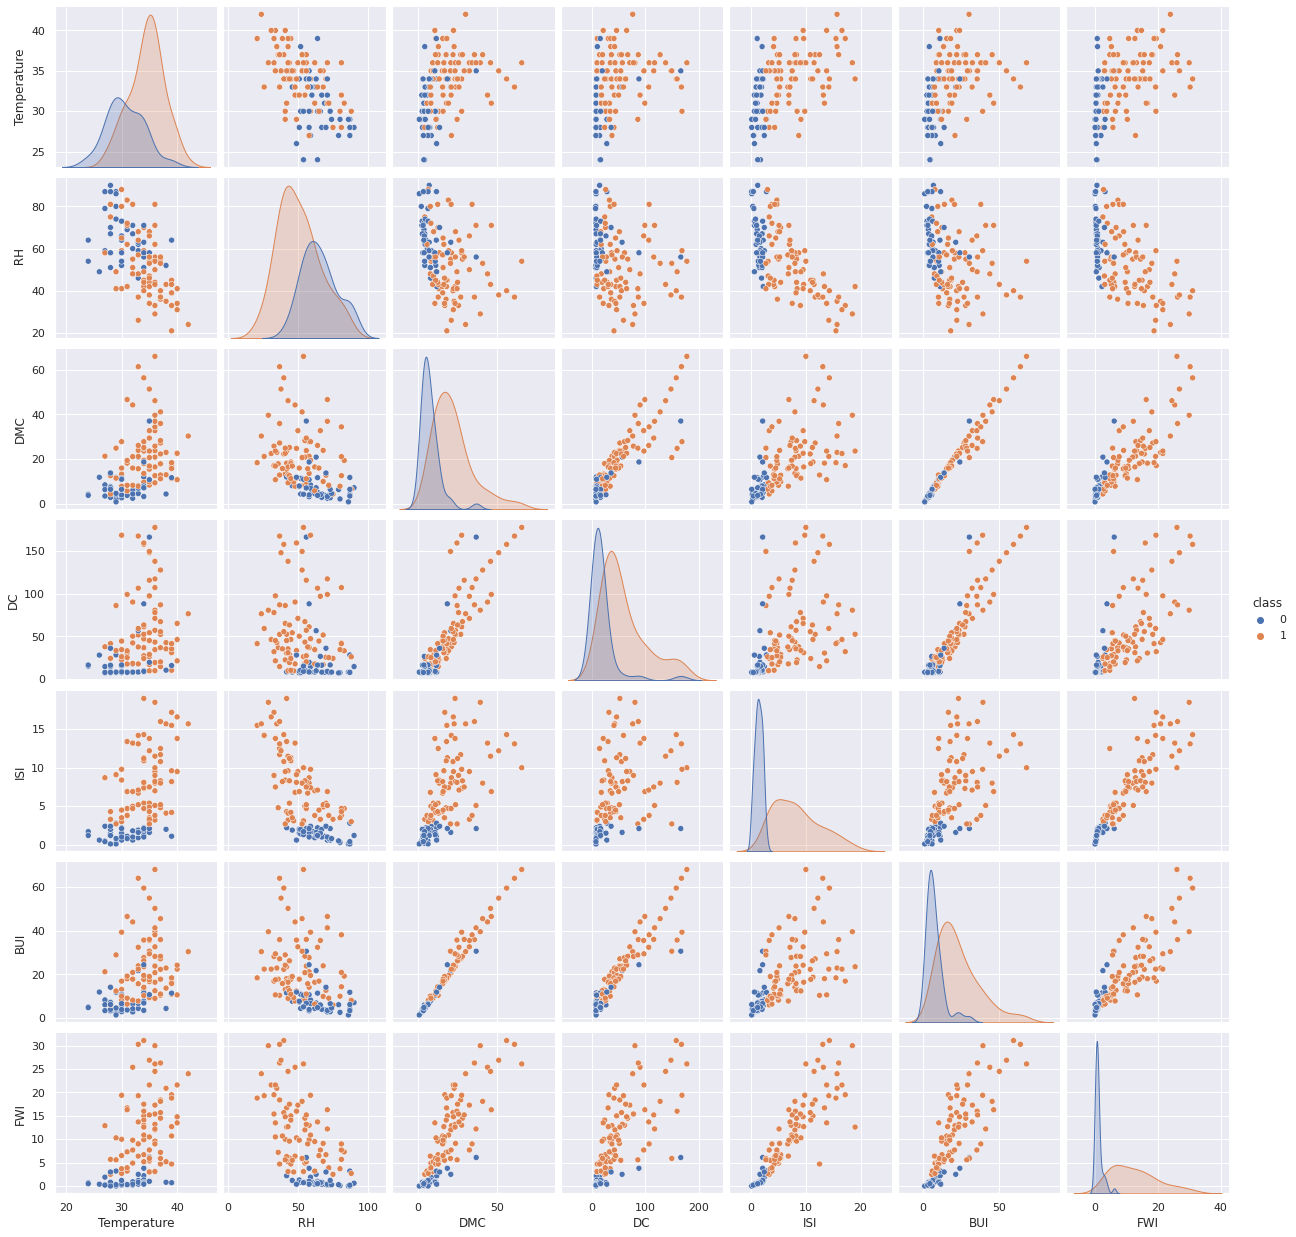

In [19]:
sns.pairplot(df, hue='class')
plt.show()

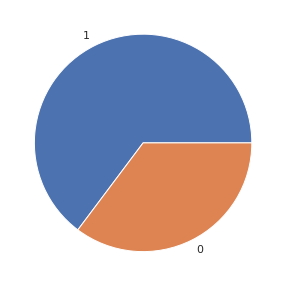

In [20]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

## **Data Matrix**

In [21]:
X = df.drop(columns=['class'])
X.head(10)

Temperature   RH   DMC    DC  ISI   BUI   FWI
0           32   71   2.5   8.2  0.6   2.8   0.2
1           30   73   2.7   7.8  0.6   2.9   0.2
2           29   80   2.2   7.6  0.3   2.6   0.1
3           30   64   5.2  15.4  2.2   5.6   1.0
4           32   60   6.0  17.6  1.8   6.5   0.9
5           35   54   8.4  26.3  3.1   9.3   3.1
6           35   44   9.9  28.9  5.4  10.7   6.0
7           28   51   7.7   7.4  1.5   7.3   0.8
8           27   59   8.5  14.7  2.4   8.3   1.9
9           30   41  13.3  22.5  8.4  13.1  10.0

In [22]:
X.describe().transpose()

count       mean        std   min     25%    50%     75%    max
Temperature  122.0  33.163934   3.675608  24.0  30.000  34.00  36.000   42.0
 RH          122.0  55.901639  15.716186  21.0  43.250  56.00  66.750   90.0
DMC          122.0  17.031967  12.995068   0.9   7.325  13.15  22.900   65.9
DC           122.0  45.416311  42.927028   7.3  14.700  31.50  56.975  177.3
ISI          122.0   5.892623   4.832913   0.1   1.825   4.60   8.625   19.0
BUI          122.0  17.903279  13.878868   1.4   7.400  13.90  23.875   68.0
FWI          122.0   8.473770   8.142905   0.0   0.925   5.95  13.650   31.1

## **Standardize the Data**

In [23]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature        RH       DMC        DC       ISI       BUI       FWI
0    -0.317970  0.964650 -1.122879 -0.870542 -1.099637 -1.092709 -1.020261
1    -0.864342  1.092432 -1.107425 -0.879899 -1.099637 -1.085474 -1.020261
2    -1.137528  1.539670 -1.146060 -0.884577 -1.161967 -1.107179 -1.032592
3    -0.864342  0.517413 -0.914251 -0.702124 -0.767208 -0.890131 -0.921611
4    -0.317970  0.261849 -0.852436 -0.650663 -0.850315 -0.825017 -0.933942
5     0.501587 -0.121498 -0.666989 -0.447157 -0.580217 -0.622440 -0.662654
6     0.501587 -0.760408 -0.551084 -0.386340 -0.102351 -0.521151 -0.305047
7    -1.410713 -0.313171 -0.721077 -0.889255 -0.912646 -0.767138 -0.946273
8    -1.683899  0.197958 -0.659262 -0.718498 -0.725655 -0.694789 -0.810629
9    -0.864342 -0.952081 -0.288368 -0.536045  0.520952 -0.347513  0.188203

In [24]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Temperature  122.0 -4.149686e-16  1.004124 -2.503456 -0.864342  0.228401   
 RH          122.0  1.319527e-16  1.004124 -2.229903 -0.808327  0.006284   
DMC          122.0 -2.693656e-16  1.004124 -1.246511 -0.750054 -0.299958   
DC           122.0  5.187108e-17  1.004124 -0.891594 -0.718498 -0.325522   
ISI          122.0 -1.801837e-16  1.004124 -1.203520 -0.845121 -0.268565   
BUI          122.0 -2.830159e-16  1.004124 -1.193998 -0.759903 -0.289634   
FWI          122.0 -4.823100e-17  1.004124 -1.044924 -0.930859 -0.311213   

                  75%       max  
Temperature  0.774773  2.413887  
 RH          0.693113  2.178580  
DMC          0.453421  3.776014  
DC           0.270374  3.084945  
ISI          0.567700  2.723291  
BUI          0.432049  3.624453  
FWI          0.638295  2.790102

## **Observations and variables**

In [25]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
['Temperature', ' RH', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'class']


## **Data Visualisation**

## **Box & Whisker Plots**

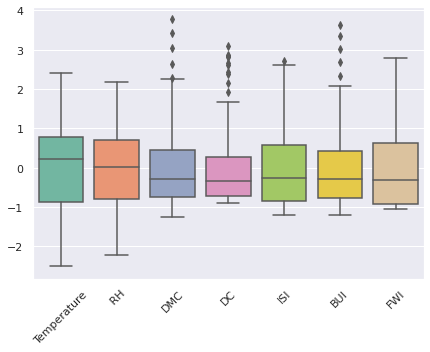

In [26]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

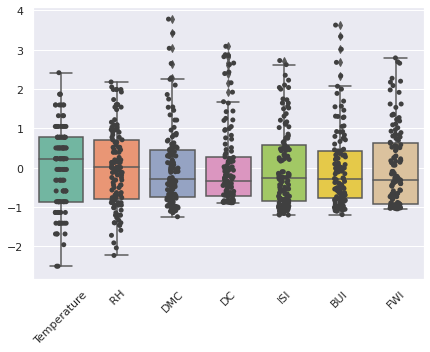

In [27]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

## **Correlation Matrix**

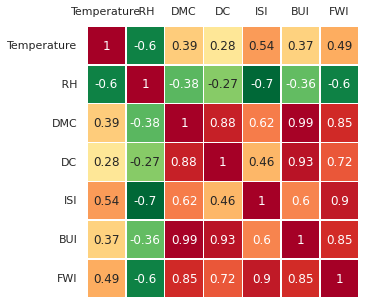

In [28]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)**

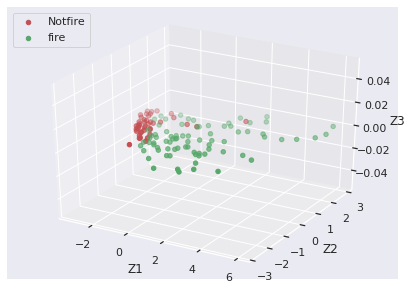

In [29]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Notfire)->0,  2(Fire)->1
idx_Notfire = np.where(y == 0)
idx_Fire = np.where(y == 1)


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(Z[idx_Notfire,0], Z[idx_Notfire,1], c='r', label='Notfire')
ax.scatter(Z[idx_Fire,0], Z[idx_Fire,1], c='g', label='fire')

ax.legend()
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

ax.legend(loc='upper left')

## **Eigenvectors**

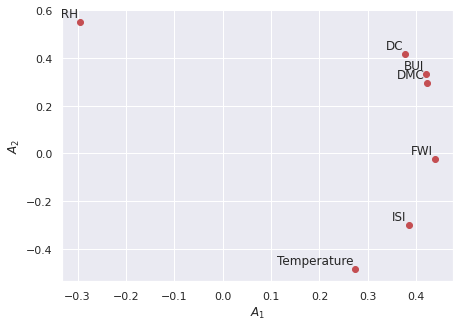

In [30]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')


In [31]:
A

array([[ 0.27436687, -0.48357233,  0.78743502, -0.26292966,  0.03026918,
        -0.02728872, -0.00581415],
       [-0.29503853,  0.55198411,  0.18808084, -0.75273511,  0.07730407,
         0.01738331,  0.00177972],
       [ 0.4219989 ,  0.29506701,  0.07634773,  0.01904282, -0.57218854,
         0.27771119,  0.5693308 ],
       [ 0.37692311,  0.41692232,  0.19339027,  0.28231056,  0.72883003,
         0.03051745,  0.18676504],
       [ 0.38437781, -0.29938474, -0.45860082, -0.44607999,  0.25835489,
         0.53264598, -0.05349218],
       [ 0.42060567,  0.33218856,  0.0886023 ,  0.07391242, -0.25953372,
         0.06770561, -0.7921404 ],
       [ 0.43916461, -0.02453829, -0.28840566, -0.28239257, -0.02024676,
        -0.79536315,  0.10293912]])

invalid value encountered in sqrt


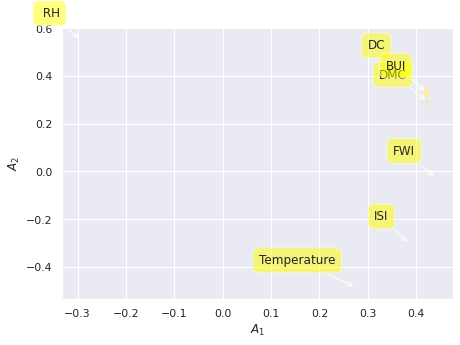

In [32]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

## **Scree plot**

Text(0, 0.5, 'Explained variance')

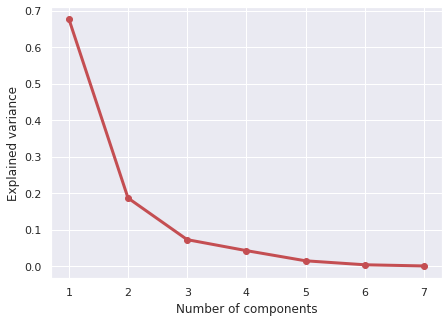

In [33]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [34]:
Lambda

array([4.7837025 , 1.31921501, 0.51395612, 0.30195301, 0.10508078,
       0.0283386 , 0.00560521])

## **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

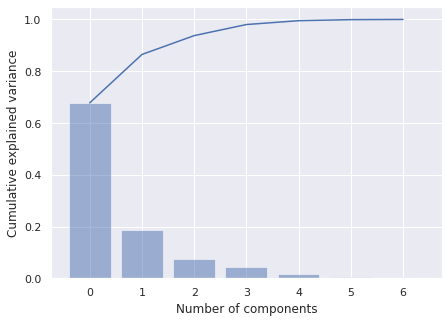

In [35]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

## **Biplot**

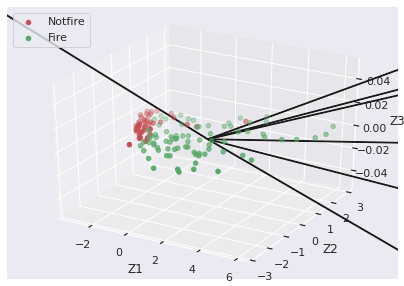

In [36]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
A3 = A[:,2]
Z1 = Z[:,0] 
Z2 = Z[:,1]
Z3 = Z[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  ax.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,A3[i]*max(Z3)*1.2,variables[i], color='k')

ax.scatter(Z[idx_Notfire,0], Z[idx_Notfire,1], c='r', label='Notfire')
ax.scatter(Z[idx_Fire,0], Z[idx_Fire,1], c='g', label='Fire')

ax.legend(loc='upper left')

## **Using PCA Librarry**

In [37]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


## **Principal Components**

In [39]:
out['PC']

PC1       PC2       PC3       PC4
0   -2.504169 -0.016775  0.378694 -0.211793
1   -2.685738  0.321031 -0.027493 -0.166134
2   -2.949213  0.698407 -0.132128 -0.403331
3   -2.114294  0.097693 -0.250110  0.158860
4   -1.853476 -0.221076  0.194165  0.268647
..        ...       ...       ...       ...
117 -0.699018  0.774862 -0.385057 -0.025440
118 -2.924217  1.278583 -0.190261 -0.617916
119 -3.148291  1.254754 -0.477174 -0.600903
120 -2.478012  0.535177 -1.612082  1.122231
121 -2.731248  0.913620 -1.436153  0.700850

[122 rows x 4 columns]

## **Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3bbfae7d90>)

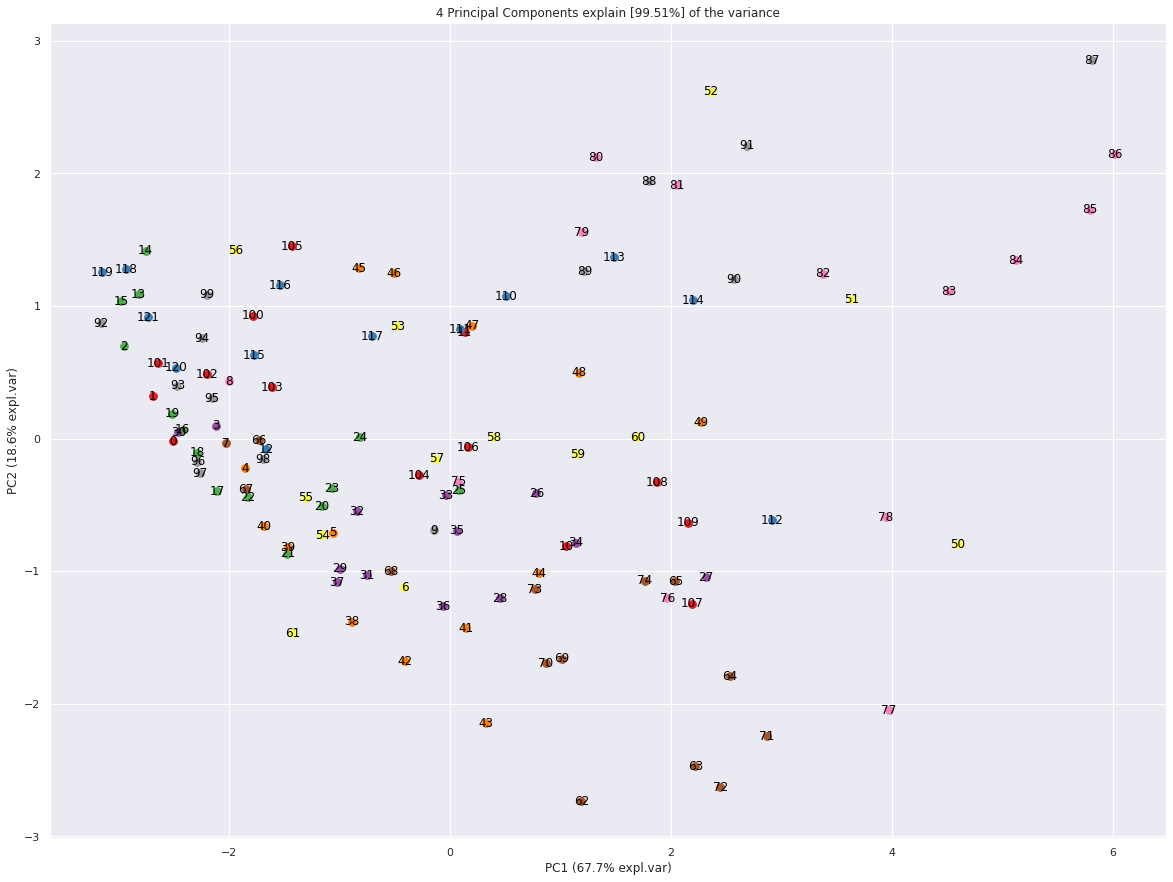

In [40]:
model.scatter(label=True, legend=False)

## **Eigenvectors**

In [41]:
A = out['loadings'].T

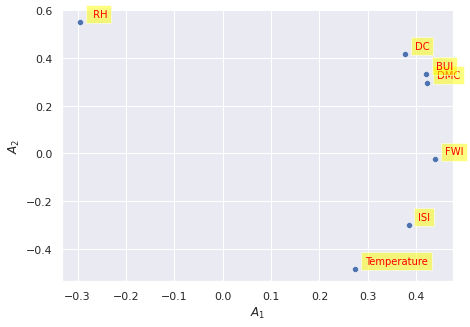

In [42]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

## **Scree Plot**

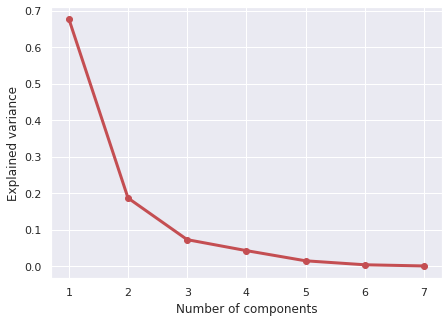

In [43]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

## **Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].


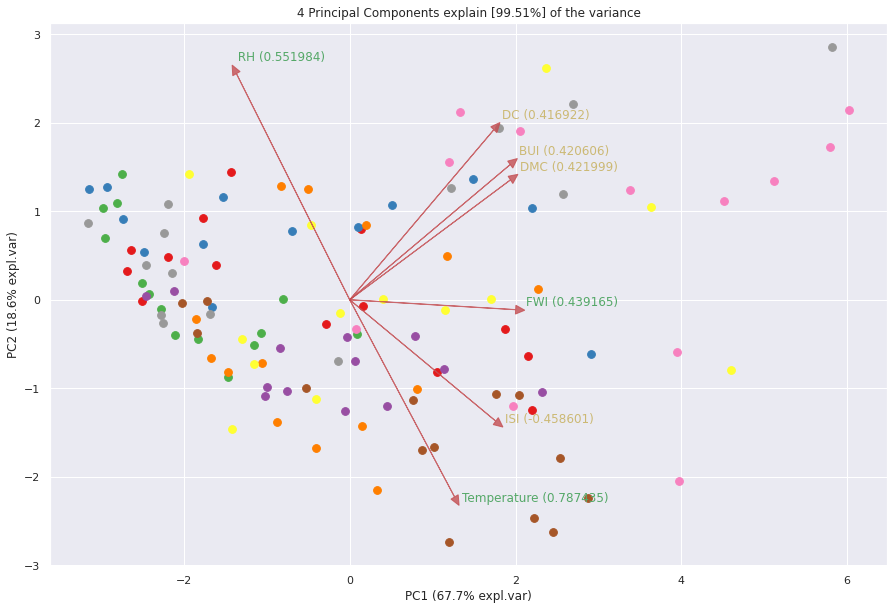

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3bbdc11850>)

In [44]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [122] unique colors! Available unique colors: [9].


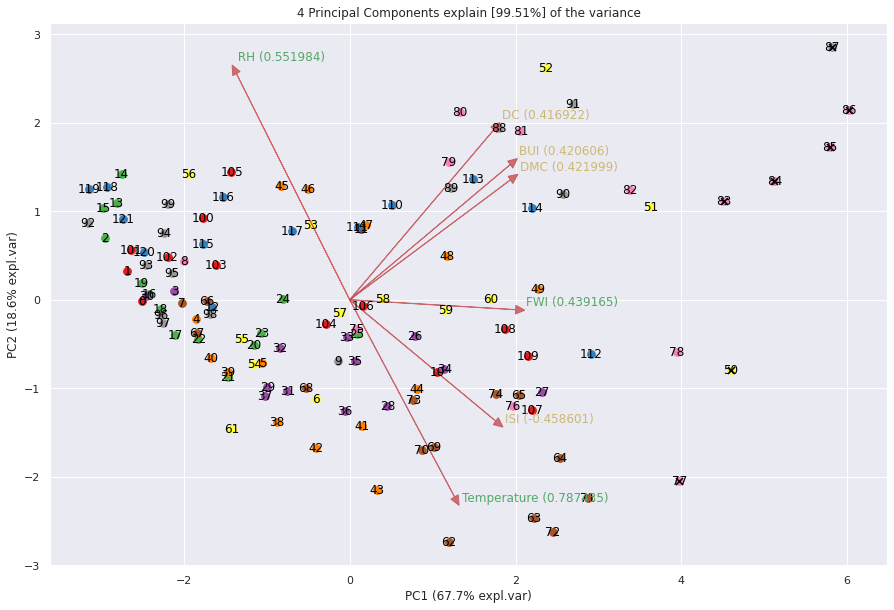

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3bc87ba0a0>)

In [45]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


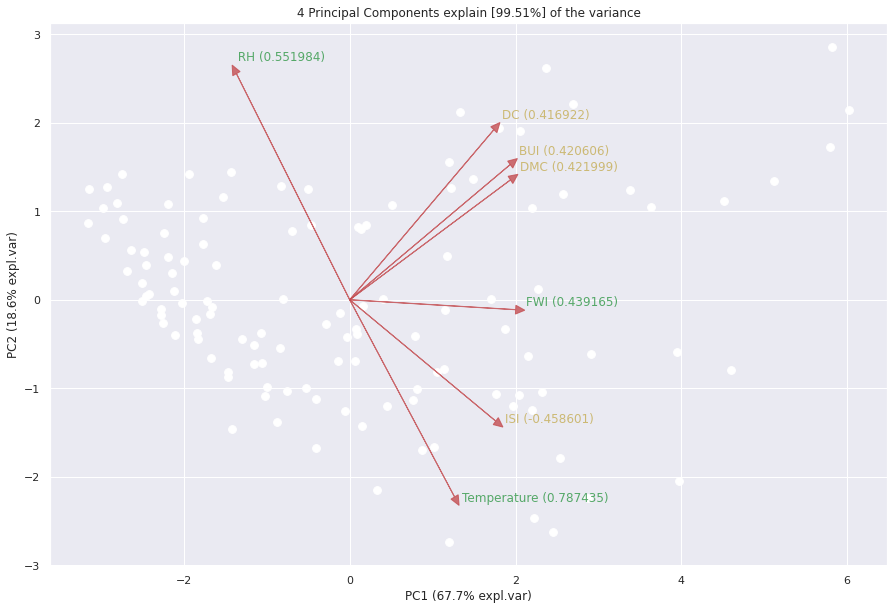

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3bbdc1a490>)

In [46]:
model.biplot(cmap=None, label=False, legend=False)

# **Classification**

### **Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [47]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [48]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (110, 8)
Unseen Data For Predictions: (12, 8)


## **Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [49]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (110, 8)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (76, 22)
12                    Transformed Test Set          (34, 22)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              5131
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:
 


* session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

*  Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

*  Label Encoded : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

*  Original Data : Displays the original shape of the dataset. In this experiment (110, 8) means 110 samples and 8 features including the class column.

* Missing Values : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* Numeric Features : The number of features inferred as numeric. In this dataset, 6 out of 8 features are inferred as numeric.

* Categorical Features : The number of features inferred as categorical. In this dataset, there is one categorical features.

* Transformed Train Set : Displays the shape of the transformed training 
set. Notice that the original shape of (110, 8) is transformed into (76, 22) for the transformed train set.

* Transformed Test Set : Displays the shape of the transformed test/hold-out set. There are 34 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.













# **Comparing All Models**

In [50]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9750  1.0000    0.98  0.9833   
lightgbm  Light Gradient Boosting Machine    0.9750  1.0000    0.98  0.9833   
dt               Decision Tree Classifier    0.9625  0.9567    0.98  0.9667   
gbc          Gradient Boosting Classifier    0.9625  0.9567    0.98  0.9667   
ada                  Ada Boost Classifier    0.9607  0.9733    0.98  0.9667   
rf               Random Forest Classifier    0.9482  0.9900    1.00  0.9381   
et                 Extra Trees Classifier    0.8982  0.9700    0.94  0.9214   
ridge                    Ridge Classifier    0.8446  0.0000    0.88  0.8898   
lda          Linear Discriminant Analysis    0.8321  0.8767    0.88  0.8698   
knn                K Neighbors Classifier    0.8179  0.8750    0.84  0.8850   
nb                            Naive Bayes    0.7750  0.8100    0.75  0.8767   
svm                   SVM - Linear Kernel    0.7696  0.0000    0.86  0.8292   
dummy                    Dummy Classifier    0.6464  0.5000    1.00  0.6464   
qda       Quadratic Discriminant Analysis    0.3536  0.0000    0.00  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9798  0.9464  0.9520     0.404  
lightgbm  0.9798  0.9464  0.9520     0.098  
dt        0.9707  0.9179  0.9265     0.014  
gbc       0.9707  0.9179  0.9265     0.058  
ada       0.9707  0.9053  0.9165     0.085  
rf        0.9652  0.8687  0.8879     0.202  
et        0.9199  0.7681  0.7999     0.169  
ridge     0.8765  0.6581  0.6868     0.012  
lda       0.8676  0.6297  0.6560     0.014  
knn       0.8570  0.6073  0.6199     0.020  
nb        0.8033  0.5347  0.5510     0.013  
svm       0.8252  0.4646  0.4707     0.013  
dummy     0.7843  0.0000  0.0000     0.014  
qda       0.0000  0.0000  0.0000     0.018

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [51]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

*  SVM-Linear kemel ('SVM')
*  Logistic Regression ('LR')
*  Quadratic Discriminant Analysis ('QDA') 

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.






# **SVM**

In [52]:
svm = create_model('svm')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  0.0   0.800  1.0000  0.8889  0.7500  0.7746
1       0.6250  0.0   1.000  0.6250  0.7692  0.0000  0.0000
2       0.5000  0.0   0.400  0.6667  0.5000  0.0588  0.0667
3       0.6250  0.0   1.000  0.6250  0.7692  0.0000  0.0000
4       0.6250  0.0   1.000  0.6250  0.7692  0.0000  0.0000
5       0.8750  0.0   0.800  1.0000  0.8889  0.7500  0.7746
6       1.0000  0.0   1.000  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.0   1.000  1.0000  1.0000  1.0000  1.0000
8       1.0000  0.0   1.000  1.0000  1.0000  1.0000  1.0000
9       0.5714  0.0   0.600  0.7500  0.6667  0.0870  0.0913
Mean    0.7696  0.0   0.860  0.8292  0.8252  0.4646  0.4707
SD      0.1887  0.0   0.201  0.1743  0.1549  0.4447  0.4469

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [53]:
#trained model object is stored in the variable 'svm'. 
svm

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### **Tune a Model**: How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

# **Tune SVM**

In [54]:
tuned_svm = tune_model(svm)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.7500  0.0  1.0000  0.7143  0.8333  0.3846  0.4880
2       0.7500  0.0  0.6000  1.0000  0.7500  0.5294  0.6000
3       0.8750  0.0  1.0000  0.8333  0.9091  0.7143  0.7454
4       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8750  0.0  0.8000  1.0000  0.8889  0.7500  0.7746
6       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.8571  0.0  1.0000  0.8333  0.9091  0.5882  0.6455
Mean    0.9107  0.0  0.9400  0.9381  0.9290  0.7967  0.8253
SD      0.0985  0.0  0.1281  0.0994  0.0829  0.2237  0.1893

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:SGDClassifier(alpha=0.15, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=False,
              l1_ratio=0.7800000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [55]:
#tuned model object is stored in the variable 'tuned_svm'. 
tuned_svm

SGDClassifier(alpha=0.15, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=False,
              l1_ratio=0.7800000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

# **Evaluate SVM**

Update statmodels

In [56]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [57]:
evaluate_model(tuned_svm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=SGDClassifier(alpha=0.15, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=False,
              l1_ratio=0.7800000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Logistic Regression Model**

In [58]:
lr = create_model('lr')


Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0        1.000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
1        1.000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
2        0.875  1.0    0.80  1.0000  0.8889  0.7500  0.7746
3        0.875  1.0    1.00  0.8333  0.9091  0.7143  0.7454
4        1.000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
5        1.000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
6        1.000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
7        1.000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
8        1.000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
9        1.000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
Mean     0.975  1.0    0.98  0.9833  0.9798  0.9464  0.9520
SD       0.050  0.0    0.06  0.0500  0.0407  0.1074  0.0962

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Tune Logistic Regression Model**

In [59]:
tuned_lr = tune_model(lr)

Accuracy  AUC  Recall  Prec.      F1  Kappa     MCC
0       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
1       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
2       0.8750  1.0    0.80    1.0  0.8889  0.750  0.7746
3       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
4       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
5       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
6       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
7       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
8       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
9       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
Mean    0.9875  1.0    0.98    1.0  0.9889  0.975  0.9775
SD      0.0375  0.0    0.06    0.0  0.0333  0.075  0.0676

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Logistic Regression Model**

In [60]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create qda**

In [61]:
qda = create_model('qda')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0       0.3750  0.0     0.0    0.0  0.0    0.0  0.0
1       0.3750  0.0     0.0    0.0  0.0    0.0  0.0
2       0.3750  0.0     0.0    0.0  0.0    0.0  0.0
3       0.3750  0.0     0.0    0.0  0.0    0.0  0.0
4       0.3750  0.0     0.0    0.0  0.0    0.0  0.0
5       0.3750  0.0     0.0    0.0  0.0    0.0  0.0
6       0.4286  0.0     0.0    0.0  0.0    0.0  0.0
7       0.2857  0.0     0.0    0.0  0.0    0.0  0.0
8       0.2857  0.0     0.0    0.0  0.0    0.0  0.0
9       0.2857  0.0     0.0    0.0  0.0    0.0  0.0
Mean    0.3536  0.0     0.0    0.0  0.0    0.0  0.0
SD      0.0471  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


# **Tune QDA**

In [62]:
tuned_qda = tune_model(qda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
2       0.8750  0.9333    0.80  1.0000  0.8889  0.7500  0.7746
3       0.7500  0.8000    1.00  0.7143  0.8333  0.3846  0.4880
4       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
5       0.8750  1.0000    0.80  1.0000  0.8889  0.7500  0.7746
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
9       0.8571  0.6500    1.00  0.8333  0.9091  0.5882  0.6455
Mean    0.9357  0.9383    0.96  0.9548  0.9520  0.8473  0.8683
SD      0.0853  0.1135    0.08  0.0943  0.0614  0.2098  0.1777

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate QDA**

In [63]:
evaluate_model(tuned_qda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Random Forest Model**

In [64]:
rf = create_model('rf')

Accuracy   AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
1       0.8750  1.00     1.0  0.8333  0.9091  0.7143  0.7454
2       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
3       0.7500  0.90     1.0  0.7143  0.8333  0.3846  0.4880
4       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
9       0.8571  1.00     1.0  0.8333  0.9091  0.5882  0.6455
Mean    0.9482  0.99     1.0  0.9381  0.9652  0.8687  0.8879
SD      0.0847  0.03     0.0  0.0994  0.0567  0.2139  0.1808

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Tune Random Forest Model**

In [65]:
tuned_rf = tune_model(rf)

Accuracy   AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.00    1.00  1.0000  1.0000  1.0000  1.0000
1       0.8750  0.90    1.00  0.8333  0.9091  0.7143  0.7454
2       0.8750  1.00    0.80  1.0000  0.8889  0.7500  0.7746
3       0.8750  0.90    1.00  0.8333  0.9091  0.7143  0.7454
4       1.0000  1.00    1.00  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.00    1.00  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.00    1.00  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.00    1.00  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.00    1.00  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.00    1.00  1.0000  1.0000  1.0000  1.0000
Mean    0.9625  0.98    0.98  0.9667  0.9707  0.9179  0.9265
SD      0.0573  0.04    0.06  0.0667  0.0450  0.1258  0.1125

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Random Forest Model**

In [66]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Tune the Best Model**

In [67]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall  Prec.      F1  Kappa     MCC
0       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
1       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
2       0.8750  1.0    0.80    1.0  0.8889  0.750  0.7746
3       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
4       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
5       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
6       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
7       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
8       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
9       1.0000  1.0    1.00    1.0  1.0000  1.000  1.0000
Mean    0.9875  1.0    0.98    1.0  0.9889  0.975  0.9775
SD      0.0375  0.0    0.06    0.0  0.0333  0.075  0.0676

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [68]:
tuned_best_model

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [69]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Classification + PCA**

In [70]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (110, 8)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (76, 3)
12                    Transformed Test Set           (34, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              3e7e
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [71]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
svm                   SVM - Linear Kernel    0.9232  0.0000   0.900  0.9833   
lr                    Logistic Regression    0.8964  0.9667   0.900  0.9467   
qda       Quadratic Discriminant Analysis    0.8964  0.9667   0.920  0.9348   
knn                K Neighbors Classifier    0.8589  0.9133   0.880  0.9181   
rf               Random Forest Classifier    0.8464  0.9233   0.880  0.9014   
et                 Extra Trees Classifier    0.8464  0.9233   0.880  0.9014   
lightgbm  Light Gradient Boosting Machine    0.8464  0.9300   0.880  0.9014   
nb                            Naive Bayes    0.8393  0.9333   0.795  0.9550   
ridge                    Ridge Classifier    0.8393  0.0000   0.775  0.9750   
lda          Linear Discriminant Analysis    0.8393  0.9733   0.775  0.9750   
ada                  Ada Boost Classifier    0.8339  0.8933   0.860  0.9014   
dt               Decision Tree Classifier    0.8214  0.8050   0.860  0.8895   
gbc          Gradient Boosting Classifier    0.7804  0.9033   0.800  0.8798   
dummy                    Dummy Classifier    0.6464  0.5000   1.000  0.6464   

              F1   Kappa     MCC  TT (Sec)  
svm       0.9258  0.8422  0.8642     0.017  
lr        0.9078  0.7812  0.8013     0.017  
qda       0.9181  0.7678  0.7908     0.014  
knn       0.8888  0.6857  0.7086     0.023  
rf        0.8730  0.6625  0.6904     0.215  
et        0.8730  0.6625  0.6904     0.178  
lightgbm  0.8730  0.6625  0.6904     0.023  
nb        0.8629  0.6694  0.6918     0.014  
ridge     0.8512  0.6852  0.7160     0.013  
lda       0.8512  0.6852  0.7160     0.014  
ada       0.8619  0.6375  0.6679     0.089  
dt        0.8543  0.6045  0.6421     0.017  
gbc       0.8193  0.5286  0.5604     0.062  
dummy     0.7843  0.0000  0.0000     0.011

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [72]:
best_model_pca

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# **Tune the Best Model**

In [73]:

# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.7500  0.0  1.0000  0.7143  0.8333  0.3846  0.4880
2       0.7500  0.0  0.6000  1.0000  0.7500  0.5294  0.6000
3       0.8750  0.0  1.0000  0.8333  0.9091  0.7143  0.7454
4       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8750  0.0  0.8000  1.0000  0.8889  0.7500  0.7746
6       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.7143  0.0  0.8000  0.8000  0.8000  0.3000  0.3000
Mean    0.8964  0.0  0.9200  0.9348  0.9181  0.7678  0.7908
SD      0.1143  0.0  0.1327  0.1034  0.0916  0.2637  0.2429

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:SGDClassifier(alpha=1e-07, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [74]:
tuned_best_model_pca

SGDClassifier(alpha=1e-07, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

# **Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [75]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=SGDClassifier(alpha=1e-07, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Note: The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

# **Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [76]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
print("Numpy version: ", np.__version__)

Numpy version:  1.19.5


In [78]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import shap

In [80]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.7500  0.8667  1.0000  0.7143  0.8333  0.3846  0.4880
2       0.6250  0.9333  0.4000  1.0000  0.5714  0.3333  0.4472
3       0.6250  0.7333  0.8000  0.6667  0.7273  0.1429  0.1491
4       0.8750  1.0000  1.0000  0.8333  0.9091  0.7143  0.7454
5       0.8750  1.0000  0.8000  1.0000  0.8889  0.7500  0.7746
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.7143  0.7000  0.8000  0.8000  0.8000  0.3000  0.3000
Mean    0.8464  0.9233  0.8800  0.9014  0.8730  0.6625  0.6904
SD      0.1486  0.1116  0.1833  0.1278  0.1361  0.3245  0.3064

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [81]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
1       0.7500  0.8667    1.00  0.7143  0.8333  0.3846  0.4880
2       0.7500  0.9333    0.60  1.0000  0.7500  0.5294  0.6000
3       0.7500  0.8000    0.80  0.8000  0.8000  0.4667  0.4667
4       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
5       0.8750  0.9333    0.80  1.0000  0.8889  0.7500  0.7746
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
9       0.5714  0.7000    0.60  0.7500  0.6667  0.0870  0.0913
Mean    0.8696  0.9233    0.88  0.9264  0.8939  0.7218  0.7421
SD      0.1473  0.0989    0.16  0.1140  0.1188  0.3173  0.3030

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


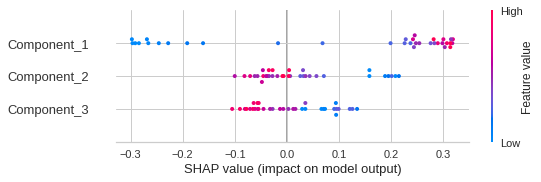

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [82]:
interpret_model(tuned_rf_pca, plot='summary')

# **Visualize a single prediction**

In [83]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

# **correlation plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=correlation, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: correlation
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: type 1


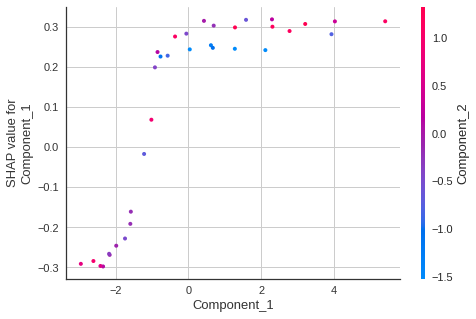

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [84]:
interpret_model(tuned_rf_pca, plot='correlation')
     

# **Visualize many predictions**

In [85]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
